In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A first look at the data

In [39]:
data = pd.read_csv('fetal_health.csv')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [41]:
data.sample(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
499,130.0,0.014,0.084,0.001,0.000,0.0,0.000,34.0,2.1,0.0,...,50.0,182.0,10.0,0.0,159.0,150.0,155.0,26.0,1.0,1.0
754,130.0,0.000,0.001,0.000,0.000,0.0,0.000,59.0,0.4,34.0,...,125.0,146.0,1.0,0.0,129.0,132.0,133.0,3.0,-1.0,1.0
235,121.0,0.003,0.006,0.000,0.000,0.0,0.000,56.0,0.6,2.0,...,62.0,139.0,3.0,0.0,127.0,128.0,129.0,3.0,1.0,1.0
21,128.0,0.005,0.425,0.003,0.003,0.0,0.002,26.0,1.7,0.0,...,57.0,198.0,9.0,0.0,129.0,125.0,132.0,34.0,0.0,1.0
181,138.0,0.017,0.000,0.005,0.000,0.0,0.000,35.0,5.3,0.0,...,52.0,200.0,11.0,2.0,146.0,157.0,161.0,72.0,1.0,1.0


In [42]:
data.describe().loc[['min','max']]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
min,106.0,0.000,0.000,0.000,0.000,0.000,0.000,12.0,0.2,0.0,...,50.0,122.0,0.0,0.0,60.0,73.0,77.0,0.0,-1.0,1.0
max,160.0,0.019,0.481,0.015,0.015,0.001,0.005,87.0,7.0,91.0,...,159.0,238.0,18.0,10.0,187.0,182.0,186.0,269.0,1.0,3.0


**The table has 21 columns that contain data of type 'float64'. The data has no missing or unknown values (null values).**

### Verifying the distribution of the data

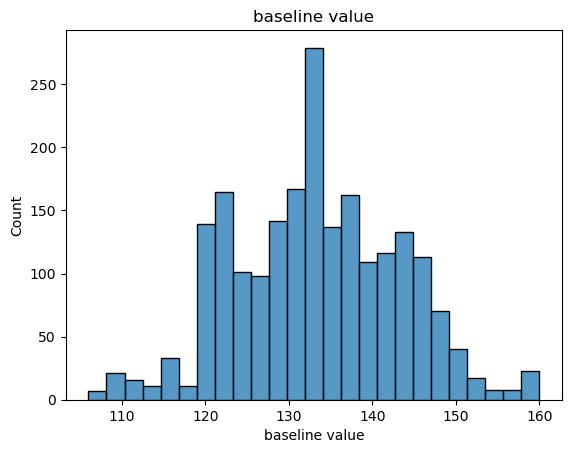

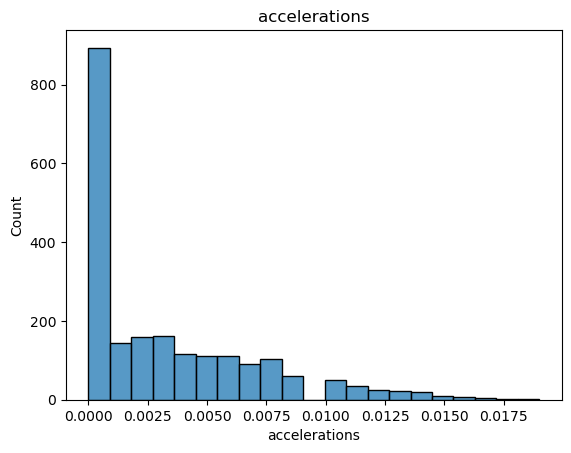

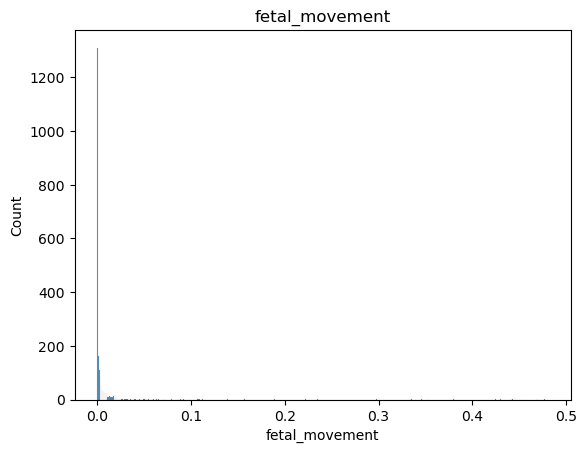

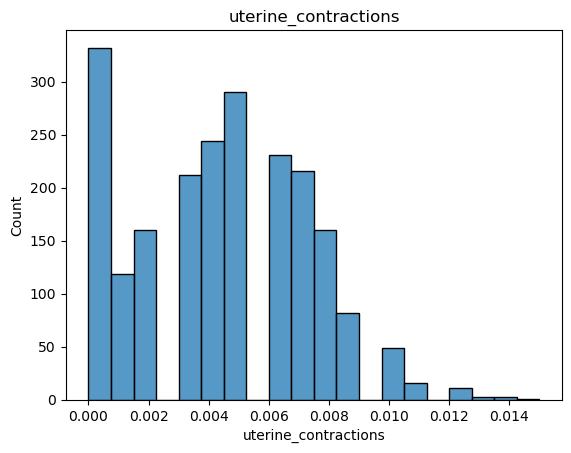

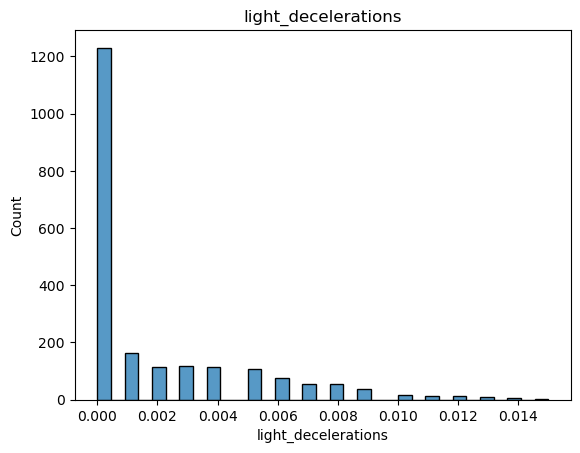

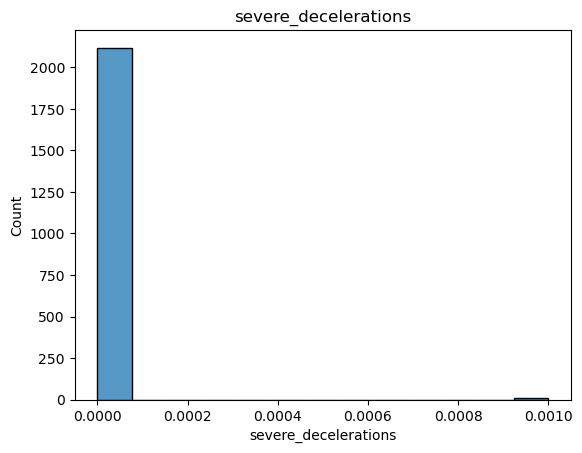

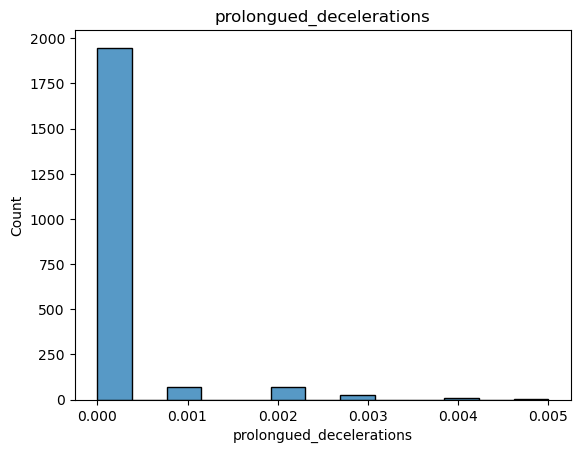

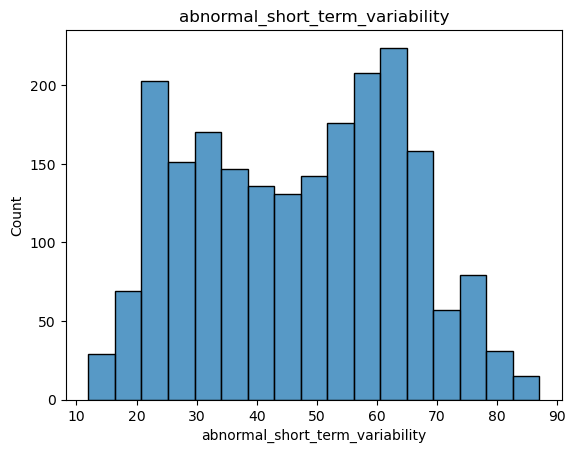

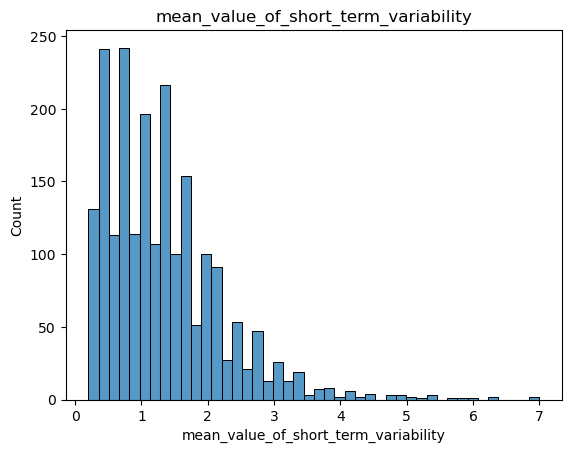

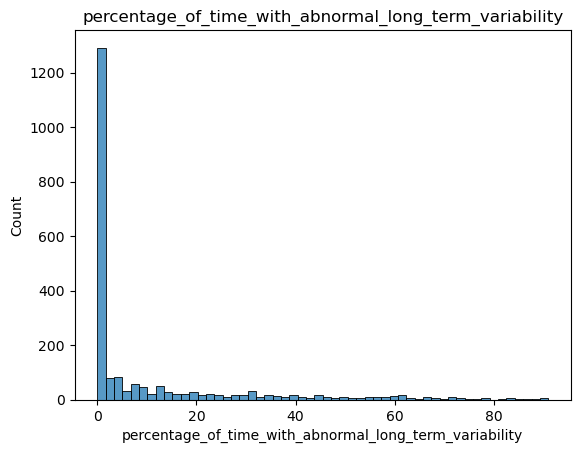

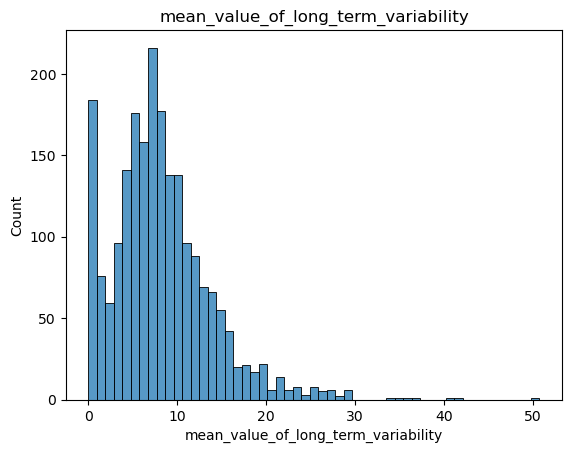

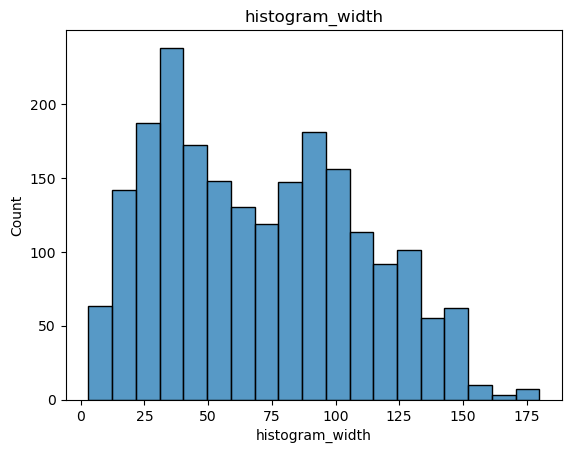

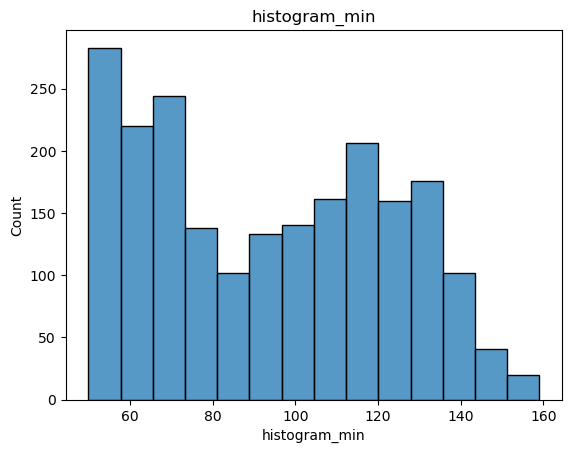

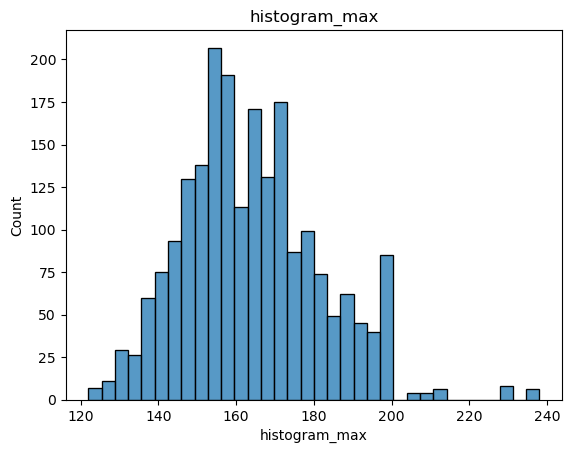

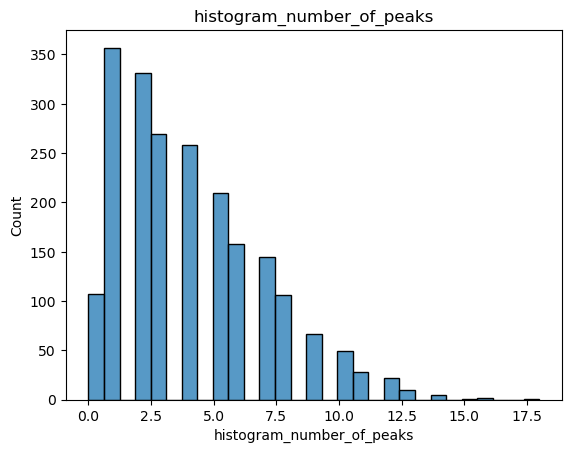

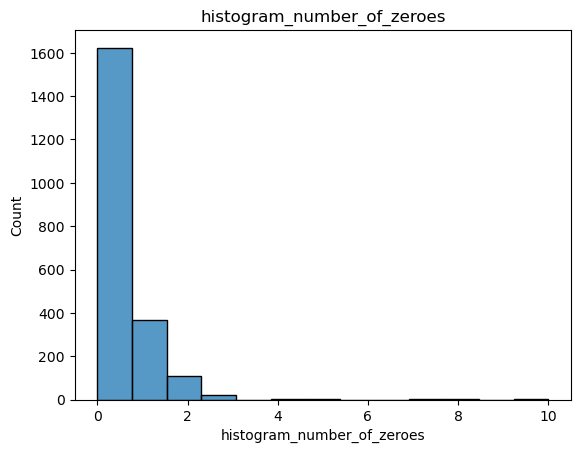

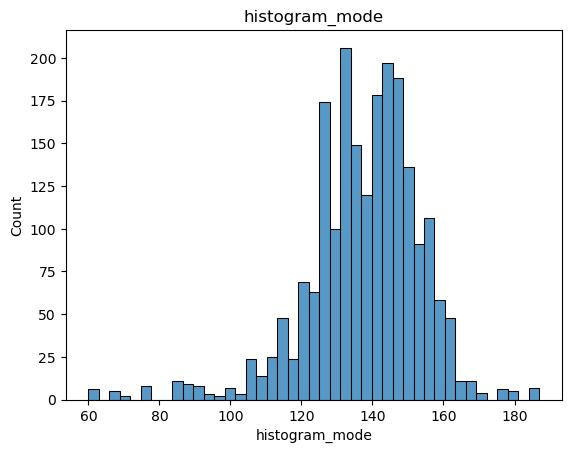

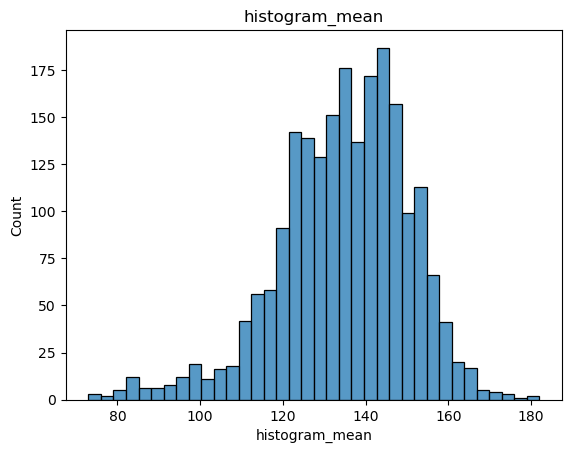

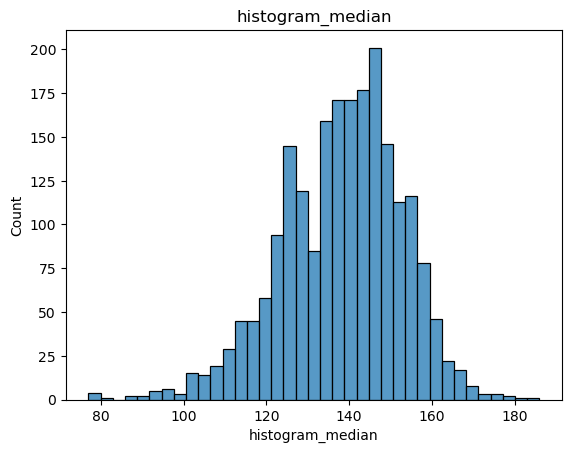

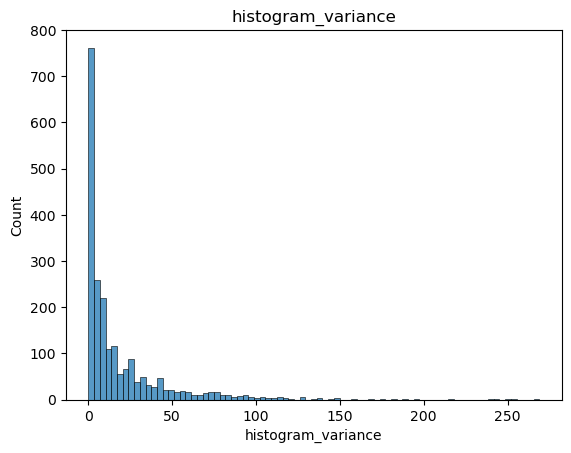

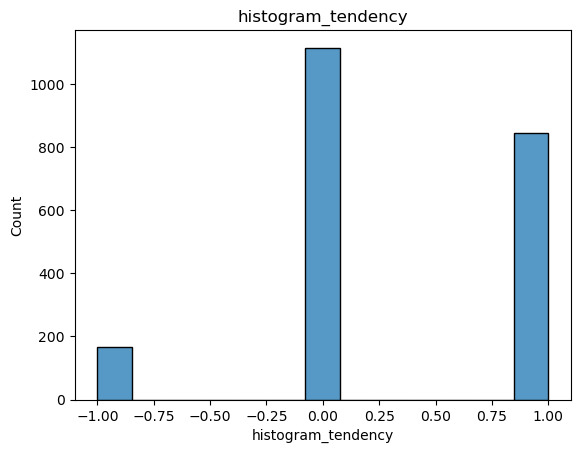

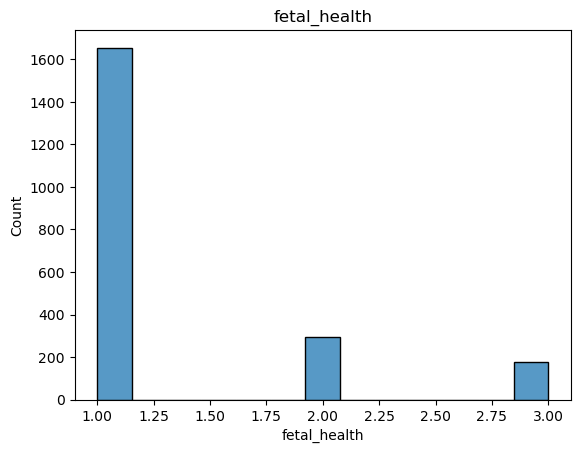

In [43]:
for col in data.columns:

    sns.histplot(data[col])
    plt.title(f'{col}')
    plt.show()

**Conclusions:**
- some of the data have a normal distribution and some have a skewed distribution,
- fetal_health, histogram_tendency columns contain categorical variables,
- data are unbalanced (most fetal assessments are positive)

### Checking the correlation between features

Dummy variables were generated to compare which characteristics have the greatest impact on individual fetal health outcomes in the three categories:

- normal (1),
- suspect (2),
- pathological (3)

In [44]:
corr_data = data.copy()
fetal_dummies = pd.get_dummies(corr_data['fetal_health'])
corr_data = pd.concat([corr_data, fetal_dummies], axis = 1)
correlation_matrix = corr_data.corr()

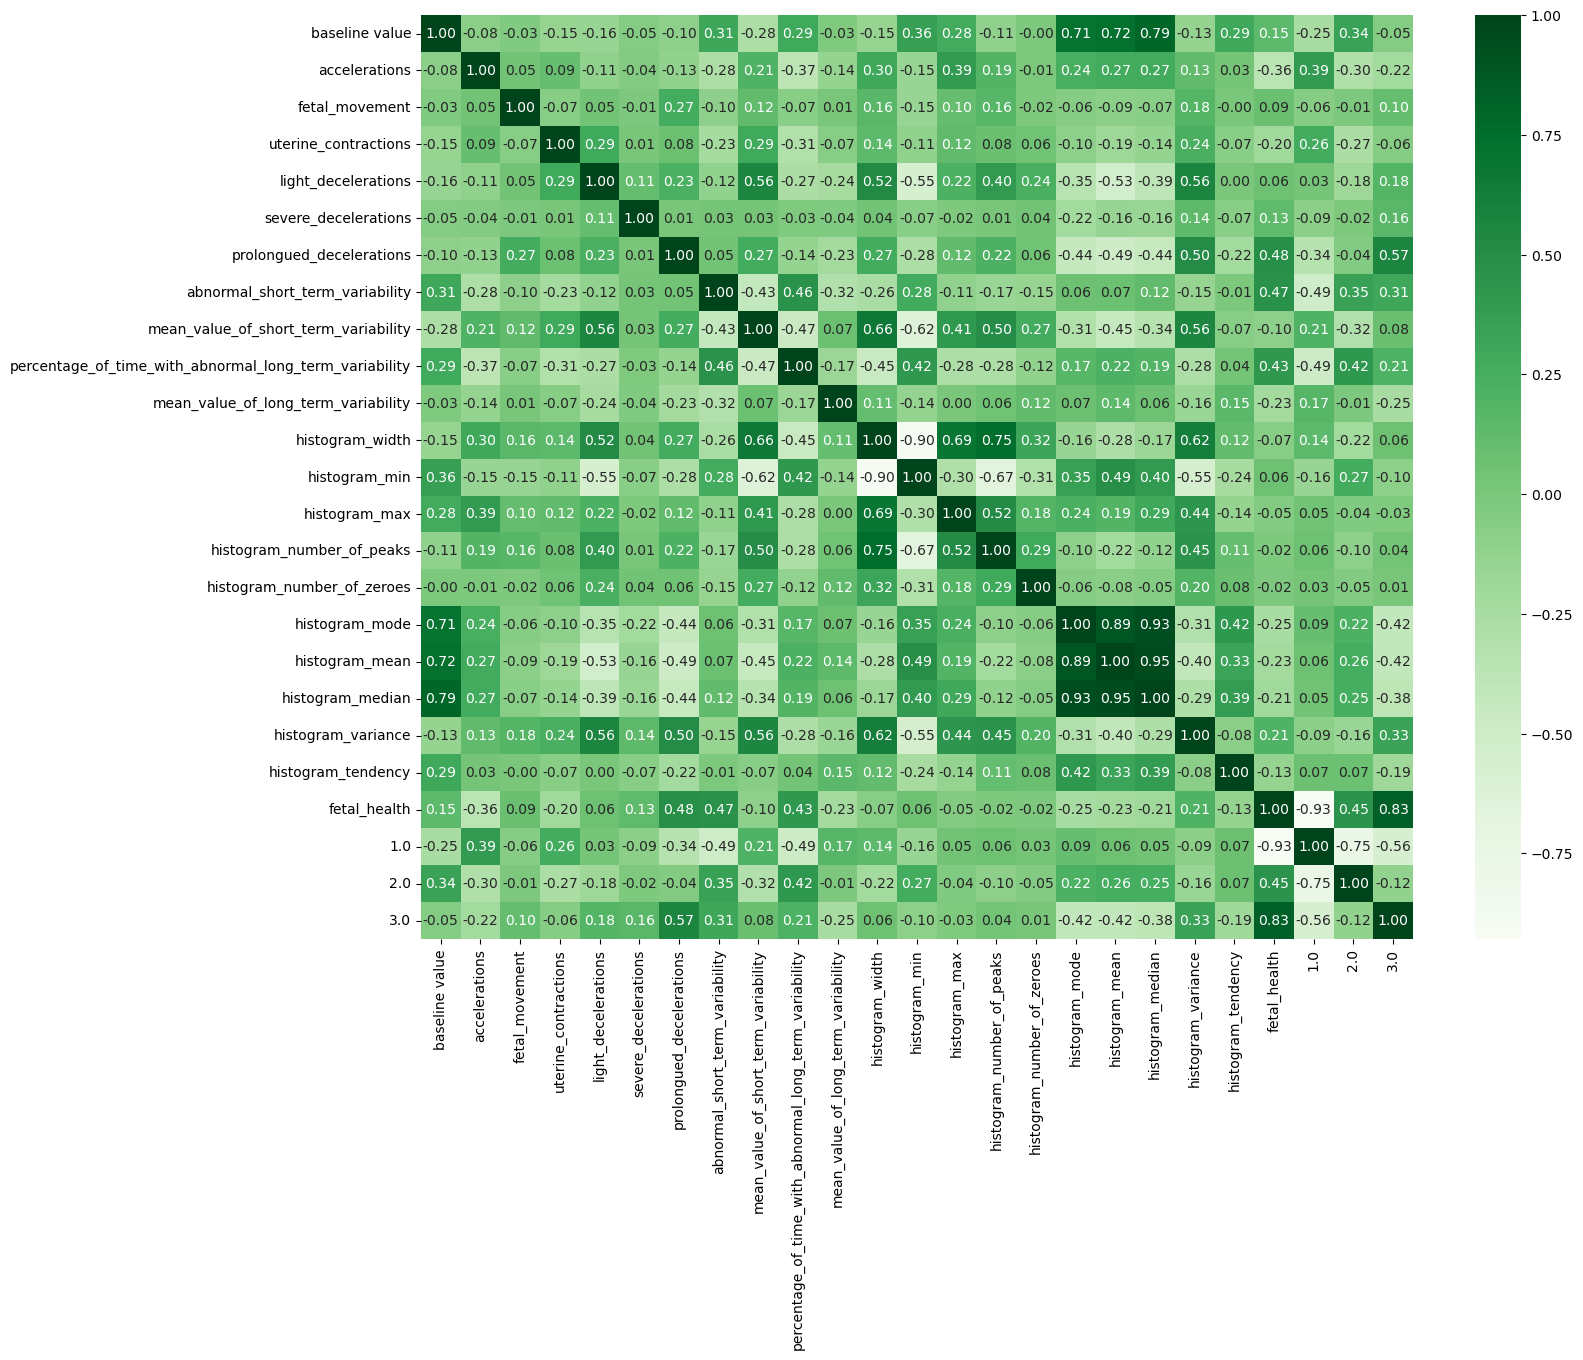

In [45]:
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap="Greens")
plt.show()